<a href="https://colab.research.google.com/github/hmd78/Segment/blob/main/deep_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [ ]:
!mkdir train

In [ ]:
!kaggle competitions download -c imaterialist-fashion-2020-fgvc7

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip -P password /content/drive/MyDrive/DeepFashion2Dataset/train.zip -d train

In [ ]:
!wget https://s3.amazonaws.com/ifashionist-dataset/images/train2020.zip

--2023-03-07 05:45:16--  https://s3.amazonaws.com/ifashionist-dataset/images/train2020.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.160.85, 52.217.160.176, 54.231.232.104, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.160.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3344364592 (3.1G) [application/zip]
Saving to: ‘train2020.zip’

train2020.zip       100%[===================>]   3.11G  40.2MB/s    in 80s     

2023-03-07 05:46:37 (39.7 MB/s) - ‘train2020.zip’ saved [3344364592/3344364592]



# RTMDet Fashion segmentation

## dependencies

In [1]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0rc1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 820.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 1.3 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html

In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git -b 3.x
# "-b 3.x" means checkout to the `3.x` branch.
%cd mmdetection
!pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

Cloning into 'mmdetection'...
remote: Enumerating objects: 34383, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 34383 (delta 15), reused 44 (delta 6), pack-reused 34309
Receiving objects: 100% (34383/34383), 46.43 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (24252/24252), done.
/content/mmdetection
Using pip 22.0.4 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-lsc7j5f9/mmdet.egg-info
  writing /tmp/pip-pip-egg-info-lsc7j5f9/mmdet.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-lsc7j5f9/mmdet.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-lsc7j5f9/mmdet.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-

In [3]:
!mim download mmdet --config rtmdet-ins_s_8xb32-300e_coco --dest .

processing rtmdet-ins_s_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MiB 12.4 MB/s eta 0:00:00
Successfully downloaded rtmdet-ins_s_8xb32-300e_coco_20221121_212604-fdc5d7ec.pth to /content/mmdetection
Successfully dumped rtmdet-ins_s_8xb32-300e_coco.py to /content/mmdetection


In [ ]:
!python demo/image_demo.py demo/demo.jpg /content/mmdetection/rtmdet-ins_s_8xb32-300e_coco.py --weights /content/mmdetection/rtmdet-ins_s_8xb32-300e_coco_20221121_212604-fdc5d7ec.pth --device cuda

In [4]:
from mmdet.apis import init_detector, inference_detector

config_file = '/content/mmdetection/rtmdet-ins_s_8xb32-300e_coco.py'
checkpoint_file = 'rtmdet-ins_s_8xb32-300e_coco_20221121_212604-fdc5d7ec.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda')  # or device='cuda:0'
# inference_detector(model, 'demo/demo.jpg')

In [4]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [6]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: rtmdet-ins_s_8xb32-300e_coco_20221121_212604-fdc5d7ec.pth


In [ ]:
img = mmcv.imread( 'demo/demo.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)

In [8]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:166: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


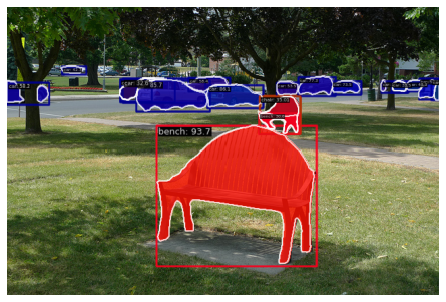

In [9]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

## ModaNet dataset

In [12]:
%cd ..

/content


In [ ]:
!wget -c https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip

In [ ]:
!unzip balloon_dataset.zip -d ./ballondatasets/

In [ ]:
!apt-get -q install tree

In [ ]:
!tree ballondatasets

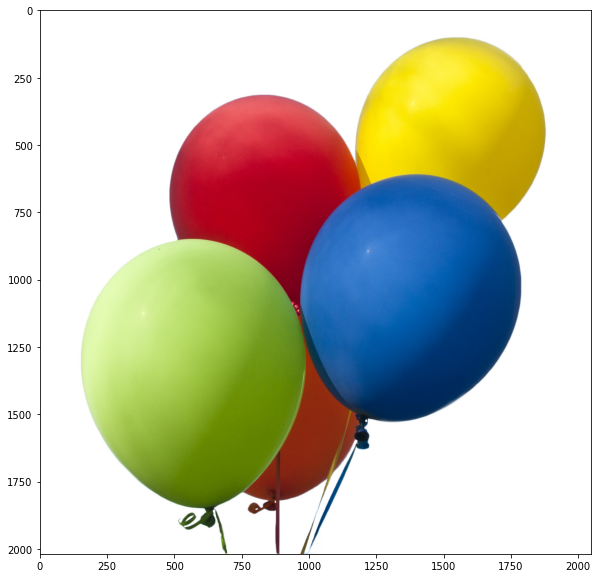

In [18]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('ballondatasets/balloon/train/10464445726_6f1e3bbe6a_k.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [19]:
import os.path as osp

def convert_balloon_to_coco(ann_file, out_file, image_prefix):
    data_infos = mmengine.load(ann_file)

    annotations = []
    images = []
    obj_count = 0
    for idx, v in enumerate(mmengine.track_iter_progress(data_infos.values())):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(dict(
            id=idx,
            file_name=filename,
            height=height,
            width=width))

        bboxes = []
        labels = []
        masks = []
        for _, obj in v['regions'].items():
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj['all_points_x']
            py = obj['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (
                min(px), min(py), max(px), max(py))


            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=[poly],
                iscrowd=0)
            annotations.append(data_anno)
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id':0, 'name': 'balloon'}])
    mmengine.dump(coco_format_json, out_file)

In [21]:
import mmengine

In [22]:
convert_balloon_to_coco(
    './ballondatasets/balloon/train/via_region_data.json',
    './ballondatasets/balloon/train/annotation_coco.json',
    './ballondatasets/balloon/train/')
convert_balloon_to_coco(
    './ballondatasets/balloon/val/via_region_data.json',
    './ballondatasets/balloon/val/annotation_coco.json',
    './ballondatasets/balloon/val/')


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 28.6 task/s, elapsed: 2s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 13/13, 35.3 task/s, elapsed: 0s, ETA:     0s


## Load dataset

In [5]:
%cd ..

/content


In [ ]:
# !wget https://s3.amazonaws.com/ifashionist-dataset/images/train2020.zip
# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/instances_attributes_train2020.json
!unzip /content/train2020.zip -d train_images/

In [25]:
# !wget https://s3.amazonaws.com/ifashionist-dataset/images/val_test2020.zip
# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/instances_attributes_val2020.json
!unzip /content/val_test2020.zip -d train_images/

Archive:  /content/val_test2020.zip
replace train_images/test/968a55c5e4d4d763b0007b1fa8993644.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_images/test/968a55c5e4d4d763b0007b1fa8993644.jpg  
replace train_images/test/93689df6d05b8406fcf9083057344e3e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace train_images/test/93689df6d05b8406fcf9083057344e3e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_images/test/93689df6d05b8406fcf9083057344e3e.jpg  
  inflating: train_images/test/63428001d1dead4d5afcbabfc9777c67.jpg  
  inflating: train_images/test/90b3a9254b942e4fb986258899b4d39c.jpg  
  inflating: train_images/test/2ddb7061e681364714475dc59c928420.jpg  
  inflating: train_images/test/15620ac788726611486d881df27a36b0.jpg  
  inflating: train_images/test/ca3219b86968d6720061e8747092fced.jpg  
  inflating: train_images/test/f857bb395ccfcdb1bcf71f6864ea48c9.jpg  
  inflating: train_images/test/76865174d4c6dd61ba58e6ed3413295f

In [1]:
!find /content/train_images/train -type f | wc -l

623


In [27]:
!find /content/train_images/train -maxdepth 1 -type f -name "*.jpg" -print0 | \
        head -z -n 45000 | xargs -0 rm

In [2]:
!find /content/train_images/test -type f | wc -l

200


In [30]:
!find /content/train_images/test -maxdepth 1 -type f -name "*.jpg" -print0 | \
        head -z -n 3000 | xargs -0 rm

## train

In [3]:
from mmengine.config import Config, DictAction
from mmengine.logging import print_log
from mmengine.registry import RUNNERS
from mmengine.runner import Runner

In [ ]:
!python /content/mmdetection/tools/train.py  /content/experiments/rtmdet-ins_s_8xb32-300e_coco.py

In [ ]:
cat = [
    {
      "id": 0,
      "name": "shirt, blouse",
      "supercategory": "upperbody",
      "level": 2,
      "taxonomy_id": "combo000000"
    },
    {
      "id": 1,
      "name": "top, t-shirt, sweatshirt",
      "supercategory": "upperbody",
      "level": 2,
      "taxonomy_id": "combo000001"
    },
    {
      "id": 2,
      "name": "sweater",
      "supercategory": "upperbody",
      "level": 2,
      "taxonomy_id": "obj000008_00"
    },
    {
      "id": 3,
      "name": "cardigan",
      "supercategory": "upperbody",
      "level": 2,
      "taxonomy_id": "obj000009_00"
    },
    {
      "id": 4,
      "name": "jacket",
      "supercategory": "upperbody",
      "level": 2,
      "taxonomy_id": "obj000010_00"
    },
    {
      "id": 5,
      "name": "vest",
      "supercategory": "upperbody",
      "level": 2,
      "taxonomy_id": "obj000011_00"
    },
    {
      "id": 6,
      "name": "pants",
      "supercategory": "lowerbody",
      "level": 2,
      "taxonomy_id": "obj000013_00"
    },
    {
      "id": 7,
      "name": "shorts",
      "supercategory": "lowerbody",
      "level": 2,
      "taxonomy_id": "obj000014_00"
    },
    {
      "id": 8,
      "name": "skirt",
      "supercategory": "lowerbody",
      "level": 2,
      "taxonomy_id": "obj000015_00"
    },
    {
      "id": 9,
      "name": "coat",
      "supercategory": "wholebody",
      "level": 2,
      "taxonomy_id": "obj000017_00"
    },
    {
      "id": 10,
      "name": "dress",
      "supercategory": "wholebody",
      "level": 2,
      "taxonomy_id": "obj000018_00"
    },
    {
      "id": 11,
      "name": "jumpsuit",
      "supercategory": "wholebody",
      "level": 2,
      "taxonomy_id": "obj000019_00"
    },
    {
      "id": 12,
      "name": "cape",
      "supercategory": "wholebody",
      "level": 2,
      "taxonomy_id": "obj000020_00"
    },
    {
      "id": 13,
      "name": "glasses",
      "supercategory": "head",
      "level": 2,
      "taxonomy_id": "obj000023_00"
    },
    {
      "id": 14,
      "name": "hat",
      "supercategory": "head",
      "level": 2,
      "taxonomy_id": "obj000025_00"
    },
    {
      "id": 15,
      "name": "headband, head covering, hair accessory",
      "supercategory": "head",
      "level": 2,
      "taxonomy_id": "combo000002"
    },
    {
      "id": 16,
      "name": "tie",
      "supercategory": "neck",
      "level": 2,
      "taxonomy_id": "obj000030_00"
    },
    {
      "id": 17,
      "name": "glove",
      "supercategory": "arms and hands",
      "level": 2,
      "taxonomy_id": "obj000032_00"
    },
    {
      "id": 18,
      "name": "watch",
      "supercategory": "arms and hands",
      "level": 2,
      "taxonomy_id": "obj000033_00"
    },
    {
      "id": 19,
      "name": "belt",
      "supercategory": "waist",
      "level": 2,
      "taxonomy_id": "obj000035_00"
    },
    {
      "id": 20,
      "name": "leg warmer",
      "supercategory": "legs and feet",
      "level": 2,
      "taxonomy_id": "obj000037_00"
    },
    {
      "id": 21,
      "name": "tights, stockings",
      "supercategory": "legs and feet",
      "level": 2,
      "taxonomy_id": "combo000003"
    },
    {
      "id": 22,
      "name": "sock",
      "supercategory": "legs and feet",
      "level": 2,
      "taxonomy_id": "obj000040_00"
    },
    {
      "id": 23,
      "name": "shoe",
      "supercategory": "legs and feet",
      "level": 2,
      "taxonomy_id": "obj000041_00"
    },
    {
      "id": 24,
      "name": "bag, wallet",
      "supercategory": "others",
      "level": 2,
      "taxonomy_id": "combo000004"
    },
    {
      "id": 25,
      "name": "scarf",
      "supercategory": "others",
      "level": 2,
      "taxonomy_id": "obj000045_00"
    },
    {
      "id": 26,
      "name": "umbrella",
      "supercategory": "others",
      "level": 2,
      "taxonomy_id": "obj000046_00"
    },
    {
      "id": 27,
      "name": "hood",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000049_00"
    },
    {
      "id": 28,
      "name": "collar",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000050_00"
    },
    {
      "id": 29,
      "name": "lapel",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000051_00"
    },
    {
      "id": 30,
      "name": "epaulette",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000052_00"
    },
    {
      "id": 31,
      "name": "sleeve",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000053_00"
    },
    {
      "id": 32,
      "name": "pocket",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000055_00"
    },
    {
      "id": 33,
      "name": "neckline",
      "supercategory": "garment parts",
      "level": 2,
      "taxonomy_id": "obj000056_00"
    },
    {
      "id": 34,
      "name": "buckle",
      "supercategory": "closures",
      "level": 2,
      "taxonomy_id": "obj000058_00"
    },
    {
      "id": 35,
      "name": "zipper",
      "supercategory": "closures",
      "level": 2,
      "taxonomy_id": "obj000059_00"
    },
    {
      "id": 36,
      "name": "applique",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000061_00"
    },
    {
      "id": 37,
      "name": "bead",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000062_00"
    },
    {
      "id": 38,
      "name": "bow",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000063_00"
    },
    {
      "id": 39,
      "name": "flower",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000064_00"
    },
    {
      "id": 40,
      "name": "fringe",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000065_00"
    },
    {
      "id": 41,
      "name": "ribbon",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000066_00"
    },
    {
      "id": 42,
      "name": "rivet",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000067_00"
    },
    {
      "id": 43,
      "name": "ruffle",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000068_00"
    },
    {
      "id": 44,
      "name": "sequin",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000069_00"
    },
    {
      "id": 45,
      "name": "tassel",
      "supercategory": "decorations",
      "level": 2,
      "taxonomy_id": "obj000070_00"
    }
  ]

In [ ]:
print([c['name'] for c in cat])

46


In [4]:
cfg = Config.fromfile('/content/mmdetection/rtmdet-ins_s_8xb32-300e_coco.py')

In [ ]:
from mmengine.runner import set_random_seed

cfg.dataset_type = 'CocoDataset'


cfg.data_root = './content/train_images'

cfg.metainfo = {
    'classes': ('shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel')
,
    'pallete': [
        (220, 20, 60),
    ]
}


# cfg.train_dataloader.dataset.type = 'fashionpedia'
cfg.train_dataloader.dataset.data_root = '/content/train_images/'
cfg.train_dataloader.dataset.ann_file = '/content/instances_attributes_train2020.json'
cfg.train_dataloader.dataset.data_prefix.img = 'train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

# cfg.val_dataloader.dataset.type = 'fashionpedia'
cfg.val_dataloader.dataset.data_root = '/content/train_images/'
cfg.val_dataloader.dataset.ann_file = '/content/instances_attributes_val2020.json'
cfg.val_dataloader.dataset.data_prefix.img = 'test/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_evaluator.ann_file = '/content/instances_attributes_val2020.json'


cfg.model.bbox_head.num_classes = 46

cfg.load_from = '/content/mmdetection/rtmdet-ins_s_8xb32-300e_coco_20221121_212604-fdc5d7ec.pth'

cfg.work_dir = './experiments'

# cfg.optimizer.lr = 0.02 / 8
# cfg.lr_config.warmup = None
# cfg.log_config.interval = 10

# cfg.evaluation.metric = 'mAP'
# cfg.evaluation.interval = 12
# cfg.checkpoint_config.interval = 12

cfg.seed = 0
# set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# cfg.log_config.hooks = [
#     dict(type='TextLoggerHook'),
#     dict(type='TensorboardLoggerHook')]
cfg.train_cfg.val_interval = 3
cfg.default_hooks.checkpoint.interval = 3

cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10
set_random_seed(0, deterministic=False)
# cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

print(f'Config:\n{cfg.pretty_text}')


In [ ]:
runner = Runner.from_cfg(cfg)

In [7]:
import torch
torch.cuda.empty_cache()

In [8]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   39905 KB |   39905 KB |   39905 KB |       0 B  |\n|       from large pool |   18176 KB |   18176 KB |   18176 KB |       0 B  |\n|       from small pool |   21729 KB |   21729 KB |   21729 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |   39905 KB |   39905 KB |   39905 KB |       0 B  |\n|       from large pool |   18176 KB |   18176 KB |

In [12]:
import os
list_files = os.listdir('/content/train_images/train')

In [ ]:
import json
  
# Opening JSON file
f = open('/content/instances_attributes_train2020.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
id_ls = []
for i in data['images']:
    if i['file_name'] not in list_files :
      id_ls.append(i['id'])
      data['images'].remove(i)
for i in data['annotations']:
    if i['image_id'] in id_ls :
      data['annotations'].remove(i)
f.seek(0)        # <--- should reset file position to the beginning.
json.dump(data, f, indent=4)
f.truncate()    
# Closing file
f.close()

In [9]:
runner.train()

loading annotations into memory...
Done (t=8.44s)
creating index...
index created!
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stem.0.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stem.0.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stem.1.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stem.1.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stem.2.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stem.2.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stage1.0.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stage1.0.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- backbone.stage1.1.main_conv.bn.weight:weight_decay=0.0
03/11 13:41:00 - m

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.1.blocks.0.conv2.pointwise_conv.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.out_convs.0.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.out_convs.0.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.out_convs.1.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.out_convs.1.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.out_convs.2.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- neck.out_convs.2.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- bbox_head.cls_convs.0.0.bn.weight:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- bbox_head.cls_convs.0.0.bn.bias:weight_decay=0.0
03/11 13:41:00 - mmengine - INFO - paramwise_options -- bbo

/usr/local/lib/python3.9/dist-packages/mmengine/optim/optimizer/default_constructor.py:208: UserWarning: bbox_head.cls_convs.1.0.conv is duplicate. It is skipped since bypass_duplicate=True
  warnings.warn(f'{prefix} is duplicate. It is skipped since '
/usr/local/lib/python3.9/dist-packages/mmengine/optim/optimizer/default_constructor.py:208: UserWarning: bbox_head.cls_convs.1.1.conv is duplicate. It is skipped since bypass_duplicate=True
  warnings.warn(f'{prefix} is duplicate. It is skipped since '
/usr/local/lib/python3.9/dist-packages/mmengine/optim/optimizer/default_constructor.py:208: UserWarning: bbox_head.cls_convs.2.0.conv is duplicate. It is skipped since bypass_duplicate=True
  warnings.warn(f'{prefix} is duplicate. It is skipped since '
/usr/local/lib/python3.9/dist-packages/mmengine/optim/optimizer/default_constructor.py:208: UserWarning: bbox_head.cls_convs.2.1.conv is duplicate. It is skipped since bypass_duplicate=True
  warnings.warn(f'{prefix} is duplicate. It is skip

Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
03/11 13:41:03 - mmengine - INFO - load backbone. in model from: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-s_imagenet_600e.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-s_imagenet_600e.pth
Loads checkpoint by local backend from path: /content/mmdetection/rtmdet-ins_s_8xb32-300e_coco_20221121_212604-fdc5d7ec.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.rtm_cls.0.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([46, 128, 1, 1]).
size mismatch for bbox_head.rtm_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([46]).
size mismatch for bbox_head.rtm_cls.1.weight

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


FileNotFoundError: ignored

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('./ballondatasets/balloon/train/7178882742_f090f3ce56_k.jpg',channel_order='rgb')
checkpoint_file = '/content/experiments/epoch_18.pth'
model = init_detector(cfg, checkpoint_file, device='cuda')
new_result = inference_detector(model, img)
print(new_result)

In [ ]:
from mmengine.visualization import Visualizer
# get built visualizer
visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

In [ ]:
# Check the label of a single image
import mmengine

annotation = mmengine.load('/content/instances_attributes_val2020.json')

In [ ]:
annotation['/content/val_test2020/test/003d41dd20f271d27219fe7ee6de727d.jpg']